# documentation.functions

In [1]:
import os
os.chdir('..')

Here we present the documentation for the functions `circuits_utilities.py`, `patterns_utilities.py` and `QUAM.py`, contained in the module `functions` of the `qhdc` project.
```
qhdc
    |
    |_ functions
        |
        |_ circuits_utilities.py
        |
        |_ patterns_utilities.py
        |
        |_ QUAM.py
    |
    .
    .
    .  
```

## circuits_utilities

The functions contained in `circuits_utilities` are used to generate various quantum circuits. The circuits include random circuits with a high probability of the zero state, tensor product circuits, entangled circuits, and circuits with general rotations.

In [2]:
from functions import circuits_utilities as cu

### create_random_circuit_with_high_zero_prob
`create_random_circuit_with_high_zero_prob(n)`

Generates a random quantum circuit with \( n \) qubits and \( n \) classical bits, ensuring a high probability of measuring the zero state.

**Args**
* `n` (int): Number of qubits and classical bits in the circuit.

**Returns**
* `QuantumCircuit`: A quantum circuit that has a high probability of resulting in the zero state when measured.

In [3]:
# Create the circuit
n = 3
qc = cu.create_random_circuit_with_high_zero_prob(n)
print(qc)

     ┌───┐          ┌───┐
q_0: ┤ H ├───────■──┤ H ├
     ├───┤       │  ├───┤
q_1: ┤ H ├──■────┼──┤ H ├
     ├───┤┌─┴─┐┌─┴─┐├───┤
q_2: ┤ H ├┤ X ├┤ X ├┤ H ├
     └───┘└───┘└───┘└───┘
c: 3/════════════════════
                         


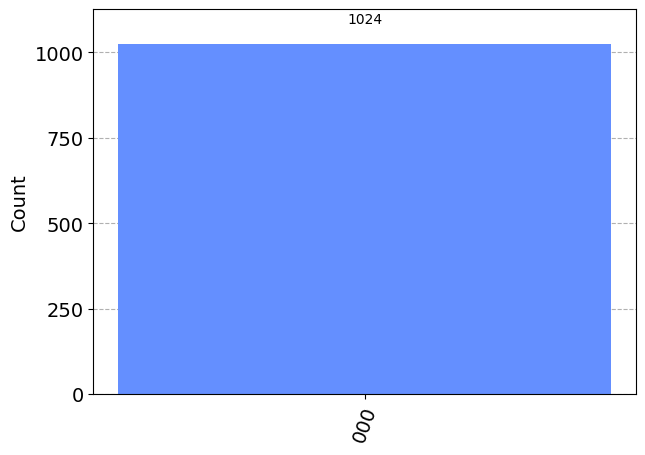

In [4]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer

# Check that the created circuit results in the zero state with high probability
backend = Aer.get_backend("qasm_simulator")
qc.measure(range(n),range(n))
t_qc = transpile(qc, backend=backend)
job = backend.run(t_qc)
result = job.result().get_counts()
plot_histogram(result)

### tensor_product_circuits
`juxtaposition_circuits(qc_1, qc_2)`

Creates a new quantum circuit that is the juxtaposition of two given quantum circuits.

**Args**
* `qc_1` (QuantumCircuit): The first quantum circuit.
* `qc_2` (QuantumCircuit): The second quantum circuit.

**Returns**
* `QuantumCircuit`: A quantum circuit that represents the juxtaposition of `qc_1` and `qc_2`.

In [5]:
qc_1 = cu.create_random_circuit_with_high_zero_prob(n)
qc_1.barrier(range(n))
qc_2 = cu.create_random_circuit_with_high_zero_prob(n)
qc = cu.juxtaposition_circuits(qc_1,qc_2)
print(qc)

     ┌───┐          ┌───┐┌───┐ ░ ┌───┐┌───┐┌───┐     
q_0: ┤ H ├──■───────┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├─────
     ├───┤  │  ┌───┐└─┬─┘├───┤ ░ ├───┤└─┬─┘└───┘┌───┐
q_1: ┤ H ├──┼──┤ X ├──┼──┤ H ├─░─┤ H ├──┼────■──┤ H ├
     ├───┤┌─┴─┐└─┬─┘  │  ├───┤ ░ ├───┤  │  ┌─┴─┐├───┤
q_2: ┤ H ├┤ X ├──■────■──┤ H ├─░─┤ H ├──■──┤ X ├┤ H ├
     └───┘└───┘          └───┘ ░ └───┘     └───┘└───┘
c: 3/════════════════════════════════════════════════
                                                     


### tensor_product_circuits
`tensor_product_circuits(qc_1, qc_2)`

Creates a new quantum circuit that is the tensor product of two given quantum circuits.

**Args**
* `qc_1` (QuantumCircuit): The first quantum circuit.
* `qc_2` (QuantumCircuit): The second quantum circuit.

**Returns**
* `QuantumCircuit`: A quantum circuit that represents the tensor product of `qc_1` and `qc_2`.

In [6]:
qc_1 = QuantumCircuit(n-1)
qc_2 = QuantumCircuit(n)
qc_1.h(0)
qc_1.cx(0, 1)
qc_2.x(0)
qc_2.y(1)
qc_2.z(2)
qc_tensor_product = cu.tensor_product_circuits(qc_1, qc_2)
print(qc_tensor_product.decompose())

      ┌───┐     
q4_0: ┤ H ├──■──
      └───┘┌─┴─┐
q4_1: ─────┤ X ├
      ┌───┐└───┘
q4_2: ┤ X ├─────
      ├───┤     
q4_3: ┤ Y ├─────
      ├───┤     
q4_4: ┤ Z ├─────
      └───┘     
c0: 5/══════════
                


### create_entangled_circuit
`create_entangled_circuit(qc_1, qc_2, entanglement_pattern)`

Combines two quantum circuits with specified entanglement between their qubits.

**Args**
* `qc_1` (QuantumCircuit): The first quantum circuit.
* `qc_2` (QuantumCircuit): The second quantum circuit.
* `entanglement_pattern` (list): A list of tuples, where each tuple specifies qubits to be entangled as `(qubit_in_qc1, qubit_in_qc2)`.

**Returns**
* `QuantumCircuit`: A quantum circuit that combines `qc_1` and `qc_2` with entanglement defined by `entanglement_pattern`.

In [7]:
qc_1 = QuantumCircuit(n)
qc_2 = QuantumCircuit(n)
qc_1.h(0)
qc_1.cx(0, 1)
qc_1.cx(1, 2)
qc_2.x(0)
qc_2.y(1)
qc_2.z(2)
entanglement_pattern = [(0, 0), (1, 1), (2, 2)]
qc_entangled = cu.create_entangled_circuit(qc_1, qc_2, entanglement_pattern)
print(qc_entangled.decompose())

      ┌───┐                         
q5_0: ┤ H ├──■─────────■────────────
      └───┘┌─┴─┐       │            
q5_1: ─────┤ X ├──■────┼────■───────
           └───┘┌─┴─┐  │    │       
q5_2: ──────────┤ X ├──┼────┼────■──
      ┌───┐     └───┘┌─┴─┐  │    │  
q5_3: ┤ X ├──────────┤ X ├──┼────┼──
      ├───┤          └───┘┌─┴─┐  │  
q5_4: ┤ Y ├───────────────┤ X ├──┼──
      ├───┤               └───┘┌─┴─┐
q5_5: ┤ Z ├────────────────────┤ X ├
      └───┘                    └───┘
c1: 6/══════════════════════════════
                                    


### create_rotation_circuit
`create_rotation_circuit(n, theta)`

Generates a quantum circuit that applies general rotations to every qubit.

**Args**
* `n` (int): Number of qubits in the circuit.
* `theta` (float): The rotation angle (in radians) to be applied to each qubit.

**Returns**
* `QuantumCircuit`: A quantum circuit with rotations applied to each qubit using the specified angle `theta`.

In [8]:
import numpy as np

theta = np.pi / 4
qc = cu.create_rotation_circuit(n, theta)
print(qc)

      ┌─────────┐┌─────────┐┌─────────┐
q6_0: ┤ Rx(π/4) ├┤ Ry(π/4) ├┤ Rz(π/4) ├
      ├─────────┤├─────────┤├─────────┤
q6_1: ┤ Rx(π/4) ├┤ Ry(π/4) ├┤ Rz(π/4) ├
      ├─────────┤├─────────┤├─────────┤
q6_2: ┤ Rx(π/4) ├┤ Ry(π/4) ├┤ Rz(π/4) ├
      └─────────┘└─────────┘└─────────┘


## patterns_utilities

In [9]:
from functions import patterns_utilities as pu

### generate_fixed_length_patterns
`generate_fixed_length_patterns(n, l)`

Generates a list of binary strings of a fixed length.

**Args**
* `n` (int): Number of binary strings to generate.
* `l` (int): The length of each binary string.

**Returns**
* `List[str]`: A list of binary strings of the specified length.

In [10]:
n = 2
l = 3
patterns = pu.generate_fixed_length_patterns(n, l)
print(patterns)

['000', '001']


### generate_patterns
`generate_patterns(n, m)`

Generates a list of \( m \) random binary strings of length \( n \).

**Args**
* `n` (int): Length of each binary string.
* `m` (int): Number of binary string patterns to generate.

**Returns**
* `List[str]`: A list of randomly generated binary string patterns.

In [11]:
m = 3
patterns = pu.generate_patterns(n,m)
print(patterns)

['11', '01', '10']


### similarity
`similarity(patterns, search, type="Hamming")`

Computes the similarity between a list of binary strings and a search string using a specified similarity measure.

**Args**
* `patterns` (List[str]): A list of binary strings to compare.
* `search` (str): A binary string to compare against the patterns.
* `type` (str): The similarity measure to use. Defaults to "Hamming".

**Returns**
* `Tuple[int, float]`: The index of the most similar pattern and the similarity score.

**Raises**
* `NotImplementedError`: If a similarity measure other than "Hamming" is requested.


In [12]:
search = '10'
similarities = pu.similarity(patterns, search)
print(similarities)

(2, 0.0)


### generate_expression
`generate_expression(patterns, search)`

Finds the binary string in a list that is most similar to a search string.

**Args**
* `patterns` (List[str]): A list of binary strings to compare.
* `search` (str): The binary string to search for within the patterns.

**Returns**
* `str`: The binary string from the list that is most similar to the search string.

In [13]:
expression = pu.generate_expression(patterns, search)
print(expression)

10


### compress
`compress(binary_string, k)`

Compresses a binary string to a fixed length \( k \) using SHA-256 hashing.

**Args**
* `binary_string` (str): The binary string to compress.
* `k` (int): The desired length of the compressed binary string.

**Returns**
* `str`: The compressed binary string of length \( k \).

**Raises**
* `AssertionError`: If the length of the binary string is not a multiple of 8.

In [14]:
binary_string = pu.generate_patterns(80,1)[0]
compressed_string = pu.compress(binary_string, 10)
print(compressed_string)

0100101111


### retrieve_original_from_compressed
`retrieve_original_from_compressed(compressed_string)`

Retrieves the original binary string from a compressed string using a lookup table.

**Args**
* `compressed_string` (str): The compressed binary string.

**Returns**
* `str`: The original binary string, or `None` if not found.

In [15]:
lookup_table = {}
lookup_table[compressed_string] = binary_string
retrieved_string = pu.retrieve_original_from_compressed(compressed_string, lookup_table)
print(retrieved_string)
print(binary_string)

01111100011111101010011100111100111100100000010001100111011101000011010111100000
01111100011111101010011100111100111100100000010001100111011101000011010111100000


### find_keys_by_value
`find_keys_by_value(d, target_value)`

Finds all keys in a dictionary that have a specific target value.

**Args**
* `d` (Dict): The dictionary to search.
* `target_value`: The value to search for.

**Returns**
* `List`: A list of keys that have the target value.

In [16]:
pu.find_keys_by_value(lookup_table, binary_string)

['0100101111']

## QUAM

The following functions are the building blocks for a "vanilla" quantum associative memory as introduced by Martinez and Ventura in [arxiv.org/abs/quant-ph/9807053](https://arxiv.org/abs/quant-ph/9807053). Here we show how to use the quantum associative memory (QuAM) for a simple pattern completion problem.

In [17]:
from functions import QUAM

### get_pattern
`get_pattern(n, s)`

Generates a bit string pattern.

**Args**
* `n` (int): Length of the pattern, corresponding to \( 2^n \) bits.
* `s` (int or str): The bit string pattern. If `s` is an integer, it is converted to a binary string; if `s` is already a string, it is returned as is.

**Returns**
* `str`: The generated bit string pattern.

### multi_phase_gate
`multi_phase_gate(qc, q, theta)`

Applies a multi-qubit controlled phase rotation, applying a phase factor \( e^{i\theta} \) if all qubits are in the \( |1\rangle \) state.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `q` (QuantumRegister): The quantum register.
* `theta` (float): The rotation angle.

### multi_CX_gate
`multi_CX_gate(qc, q_controls, q_target, sig=None)`

Applies a multi-qubit controlled-X gate based on a control signature.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `q_controls` (QuantumRegister): The controlling qubits.
* `q_target` (QuantumRegister): The target qubit.
* `sig` (list): The control signature. Defaults to `[1, 1, ..., 1]`.

### multi_CZ_gate
`multi_CZ_gate(qc, q_controls, q_target, sig=None)`

Applies a multi-qubit controlled-Z gate based on a control signature.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `q_controls` (QuantumRegister): The controlling qubits.
* `q_target` (QuantumRegister): The target qubit.
* `sig` (str): The control signature. Defaults to `"11...1"`.

### get_state
`get_state(qc, x)`

Retrieves the quantum state of a register.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register.

**Returns**
* `str`: The quantum state as a string.

### flip
`flip(qc, x, c, patterns, index)`

Applies controlled-X gates to flip the quantum register state based on the difference between patterns.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register for input bits.
* `c` (ClassicalRegister): The classical register for output bits.
* `patterns` (List[str]): The list of bit string patterns.
* `index` (int): The index of the current pattern.

### S_p
`S_p(qc, c, p)`

Applies the \( S_p \) gate, a controlled unitary gate, based on the value of \( p \).

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `c` (ClassicalRegister): The classical register for output bits.
* `p` (int): The parameter value

### save
`save(qc, x, c, patterns)`

Saves multiple bit string patterns into a quantum state.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register for input bits.
* `c` (ClassicalRegister): The classical register for output bits.
* `patterns` (List[str]): The list of bit string patterns to save.

### update
`update(x, q)`

Parses and updates a quantum register based on a query string.

**Args**
* `x` (QuantumRegister): The quantum register.
* `q` (str): The query string.

**Returns**
* `Tuple[QuantumRegister, str]`: The updated quantum register and query string.

### grover_diffusion
`grover_diffusion(qc, x)`

Performs the inversion about the mean operation in Grover's algorithm.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register.

### grover_search
`grover_search(qc, x, c, output, xc, cc, R, s, patterns, problem="pattern_completion")`

Implements Grover's search algorithm with a modified Grover iteration.

**Args**
* `qc` (QuantumCircuit): The quantum circuit.
* `x` (QuantumRegister): The quantum register for input bits.
* `c` (ClassicalRegister): The classical register for output bits.
* `output` (list): The output qubits.
* `xc` (QuantumRegister): The ancillary quantum register.
* `cc` (ClassicalRegister): The ancillary classical register.
* `R` (int): Number of iterations.
* `s` (int): The target bit pattern.
* `patterns` (List[str]): The list of bit string patterns.
* `problem` (str): The problem type. Defaults to "pattern_completion".

### QuAM
`QuAM(patterns, search=None)`

Implements Quantum Associative Memory (QuAM), which stores and retrieves bit string patterns.

**Args**
* `patterns` (List[str]): The list of bit string patterns.
* `search` (str): The target bit string for search. Defaults to `None`.

**Returns**
* `Tuple[str, dict]`: The quantum state and the result data if `search` is provided. If not, only the quantum state is returned.

['0001', '0101', '1000', '1001']
0.50 |0001> + 0.50 |0101> + 0.50 |1000> + 0.50 |1001>


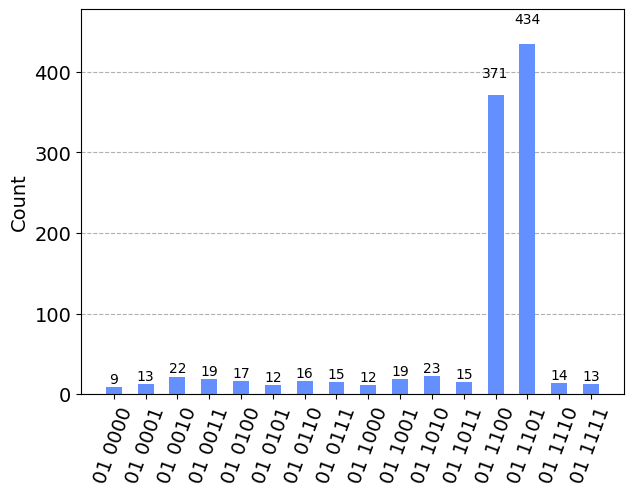

In [18]:
from qiskit.visualization import plot_histogram

patterns = pu.generate_patterns(4,4)
state, data = QUAM.QuAM(patterns, search="110?")
print(patterns)
print(state)
plot_histogram(data)